In [81]:
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
from math import sqrt
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf
from pandas.plotting import lag_plot
from pandas import DataFrame

In [61]:
df = read_csv('index.csv', header=0, index_col=0)

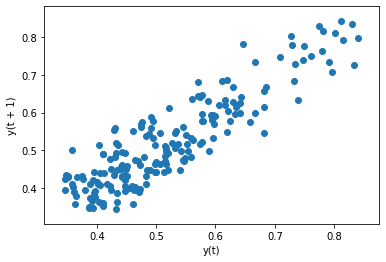

In [62]:
lag_plot(df)

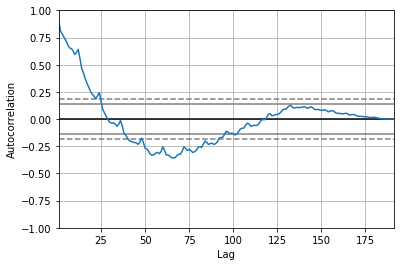

In [63]:
autocorrelation_plot(df)

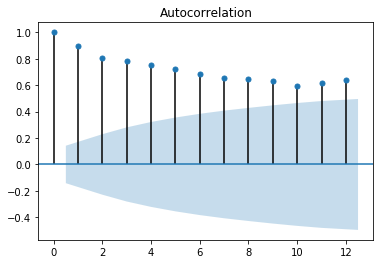

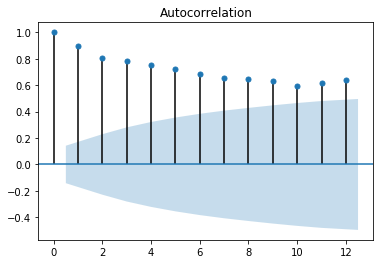

In [64]:
plot_acf(df, lags=12)

In [65]:
X = df.values

In [66]:
X

array([[0.48724004],
       [0.542706  ],
       [0.49843832],
       [0.51413561],
       [0.51282203],
       [0.44320223],
       [0.4290484 ],
       [0.43591186],
       [0.51472672],
       [0.47305336],
       [0.46152669],
       [0.35841058],
       [0.4999161 ],
       [0.46875139],
       [0.47131287],
       [0.38921406],
       [0.41019851],
       [0.49029411],
       [0.44793113],
       [0.39371307],
       [0.42264469],
       [0.40523974],
       [0.40918049],
       [0.35890317],
       [0.41236592],
       [0.44129754],
       [0.4553857 ],
       [0.4002153 ],
       [0.41725901],
       [0.41036271],
       [0.36113626],
       [0.38904986],
       [0.37486318],
       [0.4332847 ],
       [0.38668541],
       [0.34757354],
       [0.43367877],
       [0.36468293],
       [0.38041306],
       [0.39620887],
       [0.37745751],
       [0.42317012],
       [0.39397579],
       [0.34665403],
       [0.39561776],
       [0.44192149],
       [0.43206964],
       [0.345

In [67]:
train, test = X[1:len(X)-58], X[len(X)-58:]

In [68]:
model = AR(train)

In [69]:
model_fit = model.fit()

In [70]:
print('Lag: %s' % model_fit.k_ar)

Lag: 13


In [71]:
print('Coefficients: %s' % model_fit.params)

Coefficients: [ 0.03730382  0.87754479 -0.10557693  0.21594424 -0.08900598  0.13595573
 -0.10156182 -0.07441583  0.15513872  0.0796002  -0.16987805 -0.04852589
  0.43388099 -0.37626846]


In [72]:
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)

In [73]:
print(len(predictions))

58


In [74]:
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], test[i]))


predicted=0.482115, expected=0.533478
predicted=0.477731, expected=0.550522
predicted=0.479605, expected=0.539685
predicted=0.442530, expected=0.447471
predicted=0.458872, expected=0.434565
predicted=0.486538, expected=0.447340
predicted=0.429059, expected=0.422021
predicted=0.460301, expected=0.476502
predicted=0.521374, expected=0.573707
predicted=0.478852, expected=0.515942
predicted=0.461815, expected=0.464351
predicted=0.488599, expected=0.474170
predicted=0.481876, expected=0.562837
predicted=0.497330, expected=0.526089
predicted=0.499364, expected=0.519521
predicted=0.471126, expected=0.447209
predicted=0.500027, expected=0.404550
predicted=0.526669, expected=0.363139
predicted=0.488241, expected=0.359232
predicted=0.501909, expected=0.403926
predicted=0.536736, expected=0.514234
predicted=0.518541, expected=0.484284
predicted=0.518053, expected=0.447504
predicted=0.527282, expected=0.492166
predicted=0.520328, expected=0.559487
predicted=0.541338, expected=0.531803
predicted=0.

In [75]:
mse = mean_squared_error(test, predictions)

In [76]:
print('Test MSE: %.3f' % mse)

Test MSE: 0.009


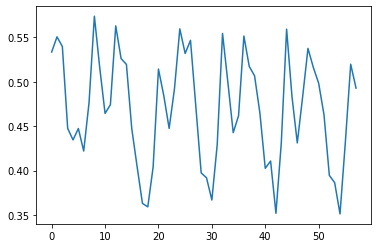

In [77]:
pyplot.plot(test)

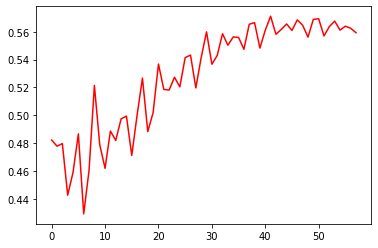

In [78]:
pyplot.plot(predictions, color='red')

In [79]:
rmse = sqrt(mse)

In [80]:
print('RMSE: %f' % rmse)

RMSE: 0.094379


In [82]:
residuals = DataFrame(model_fit.resid)

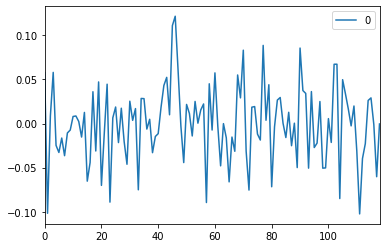

In [83]:
residuals.plot()

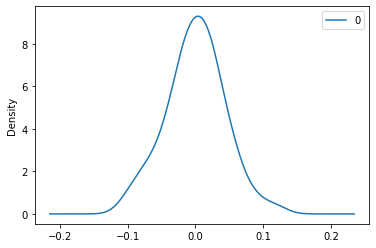

In [84]:
residuals.plot(kind='kde')

In [85]:
print(residuals.describe())

                  0
count  1.190000e+02
mean  -3.158071e-16
std    4.328907e-02
min   -1.024902e-01
25%   -2.494197e-02
50%    4.067850e-04
75%    2.641375e-02
max    1.216900e-01
